In [25]:
import pandas as pd
METRIC_SET_MAPPING = {
    "none": "NONE",
    "all-non-null-numeric": "ALL",
    "pydriller": "PyD",
    "product": "PD",
    "process": "PR",
    "javametrics-numeric": "JM",
    "javametrics2": "JM2",
    "javametrics2-process": "JM2R",
    "javametrics2-product": "JM2D",
    "pmd": "PMD"
}

MODEL_NAME_MAPPING = {
    "basic-linear-ridge": "BLR",
    "unscaled-linear": "ULR",
    "basic-randomforest": "BRF",
    "unscaled-randomforest": "URF",
    "unscaled-decisiontree": "UDT",
    "basic-adaboost": "BAB",
    "basic-gradientboost": "BGB"
}

partial_results = [
    "../../data/experiment3-final/r_1.csv",
    "../../data/experiment3-final/r_2.csv",
    "../../data/experiment3-final/r_3.csv",
    "../../data/experiment3-final/r_4.csv"
]

results = pd.concat([pd.read_csv(filepath_or_buffer=p, sep=',') for p in partial_results])
results[["TARGET", "MODEL", "METRICS", "SMELLS", "PROJECT", "ITERATION"]] = results.name.str.split("_", expand = True)
results

,model_num,metric_set,name,model_type,smell_models,real_mcc,real_f1,real_precision,real_recall,real_accuracy,...,fake_total,fit_time_sec,test_time_sec,preparation_time_sec,TARGET,MODEL,METRICS,SMELLS,PROJECT,ITERATION
0,0,process,DEFECTS_basic-linear-ridge_process_nosmells_ac...,basic-linear-ridge,False,0.257831,0.341822,0.547022,0.248575,0.780607,...,21123,2.609,0.125,3.563,DEFECTS,basic-linear-ridge,process,nosmells,activemq,0.scops
1,1,process,DEFECTS_basic-linear-ridge_process_smells_acti...,basic-linear-ridge,True,0.302461,0.413245,0.543554,0.333333,0.783056,...,21689,4.313,0.171,4.047,DEFECTS,basic-linear-ridge,process,smells,activemq,0.scops
2,2,process,DEFECTS_basic-linear-ridge_process_nosmells_ca...,basic-linear-ridge,False,0.147381,0.294825,0.201429,0.549708,0.643436,...,113746,2.609,0.781,5.157,DEFECTS,basic-linear-ridge,process,nosmells,camel,0.scops
3,3,process,DEFECTS_basic-linear-ridge_process_smells_came...,basic-linear-ridge,True,0.153425,0.298779,0.203684,0.560429,0.643304,...,115746,4.156,1.110,7.641,DEFECTS,basic-linear-ridge,process,smells,camel,0.scops
4,4,process,DEFECTS_basic-linear-ridge_process_nosmells_ca...,basic-linear-ridge,False,0.284922,0.574899,0.539696,0.615014,0.652531,...,41595,3.515,0.281,8.500,DEFECTS,basic-linear-ridge,process,nosmells,cassandra,0.scops
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,751,all-non-null-numeric,DEFECTS_unscaled-decisiontree_all-non-null-num...,unscaled-decisiontree,True,0.199804,0.544735,0.545166,0.544304,0.607509,...,7588,47.031,0.062,6.485,DEFECTS,unscaled-decisiontree,all-non-null-numeric,smells,spark,2.scops
752,752,all-non-null-numeric,DEFECTS_unscaled-decisiontree_all-non-null-num...,unscaled-decisiontree,False,0.256431,0.547038,0.596958,0.504823,0.641626,...,9329,46.062,0.032,6.469,DEFECTS,unscaled-decisiontree,all-non-null-numeric,nosmells,zeppelin,2.scops
753,753,all-non-null-numeric,DEFECTS_unscaled-decisiontree_all-non-null-num...,unscaled-decisiontree,True,0.242811,0.531915,0.592885,0.482315,0.636113,...,9329,47.046,0.047,6.657,DEFECTS,unscaled-decisiontree,all-non-null-numeric,smells,zeppelin,2.scops
754,754,all-non-null-numeric,DEFECTS_unscaled-decisiontree_all-non-null-num...,unscaled-decisiontree,False,0.255142,0.573018,0.546419,0.602339,0.634088,...,10122,45.172,0.062,6.359,DEFECTS,unscaled-decisiontree,all-non-null-numeric,nosmells,zookeeper,2.scops


In [26]:

description = results.groupby(["model_type", "metric_set", "smell_models", "PROJECT"]).describe()

In [27]:

import string

series = description.filter([("real_mcc", "50%"), ("real_precision", "50%")]).reset_index()
series["MCC"] = series[("real_mcc", "50%")]
series["Precision"] = series[("real_precision", "50%")]
series = series.drop(columns=[("real_mcc", "50%"), ("real_precision", "50%")])

incl_smells = series[series["smell_models"] == True].drop(columns=["smell_models"])
excl_smells = series[series["smell_models"] == False].drop(columns=["smell_models"])

final_series = incl_smells.merge(excl_smells, on=("metric_set", "model_type", "PROJECT"), suffixes=(" (smells)", " (no smells)"))

final_series = final_series[["metric_set", "model_type", "PROJECT", "MCC (smells)", "MCC (no smells)", "Precision (smells)", "Precision (no smells)"]]
final_series["metric_set"] = final_series["metric_set"].map(lambda x: x.replace("JAVAMETRICS", "JM"))
final_series["metric_set"] = final_series["metric_set"].map(lambda x: x.replace("_", "\\_"))

final_series["model_type"] = final_series["model_type"].map(MODEL_NAME_MAPPING)
final_series["metric_set"] = final_series["metric_set"].map(METRIC_SET_MAPPING)

remove_lowercase = str.maketrans('','', string.ascii_lowercase)
final_series["metric_set"] = final_series["metric_set"].map(lambda x: x.upper() if x.islower() else x.translate(remove_lowercase))
final_series = final_series.rename(columns={"model_type": "Model", "metric_set": "Metric set", "PROJECT": "Project"})

final_series = final_series.sort_values(by=['MCC (no smells)'], ascending=False)

final_series = final_series.reset_index(drop=True)
final_series.index += 1
final_series.style.to_latex(
    buf="performance-metrics-perproject.tex",
    caption="Prediction performance measures for per-project scenario",
    label="Appendix:DataTablePerProject",
    environment = "longtable"
)

final_series

C:\Users\Ja\AppData\Local\Temp\ipykernel_31764\431809221.py:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  incl_smells = series[series["smell_models"] == True].drop(columns=["smell_models"])
C:\Users\Ja\AppData\Local\Temp\ipykernel_31764\431809221.py:9: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  excl_smells = series[series["smell_models"] == False].drop(columns=["smell_models"])
C:\Users\Ja\AppData\Local\Temp\ipykernel_31764\431809221.py:11: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  final_series = incl_smells.merge(excl_smells, on=("metric_set", "model_type", "PROJECT"), suffixes=(" (smells)", " (no smells)"))


,Metric set,Model,Project,MCC (smells),MCC (no smells),Precision (smells),Precision (no smells)
,,,,,,,
1,ALL,URF,hadoop-hdfs,0.593378,0.592132,0.907560,0.906695
2,PR,URF,hadoop-hdfs,0.567679,0.554426,0.916747,0.915531
3,PR,URF,hadoop-mapreduce,0.542279,0.532191,0.802674,0.810931
4,PR,BLR,hadoop-mapreduce,0.386301,0.522315,0.753469,0.884211
5,ALL,URF,hadoop-mapreduce,0.511215,0.515821,0.770524,0.772391
...,...,...,...,...,...,...,...
122,PD,BLR,hadoop-hdfs,0.218370,0.125343,0.866261,0.903226
123,ALL,UDT,groovy,0.113215,0.109729,0.260500,0.258782
124,PD,UDT,camel,0.105354,0.102116,0.185004,0.181469


In [28]:
series = description.filter([("real_mcc", "50%")]).reset_index()
series["mcc"] = series[("real_mcc", "50%")]
series


,model_type,metric_set,smell_models,PROJECT,real_mcc,mcc
,,,,,50%,
0,basic-linear-ridge,all-non-null-numeric,False,activemq,0.290477,0.290477
1,basic-linear-ridge,all-non-null-numeric,False,camel,0.172412,0.172412
2,basic-linear-ridge,all-non-null-numeric,False,cassandra,0.308405,0.308405
3,basic-linear-ridge,all-non-null-numeric,False,flink,0.332928,0.332928
4,basic-linear-ridge,all-non-null-numeric,False,groovy,0.234466,0.234466
...,...,...,...,...,...,...
247,unscaled-randomforest,pydriller,True,ignite,0.482757,0.482757
248,unscaled-randomforest,pydriller,True,kafka,0.458495,0.458495
249,unscaled-randomforest,pydriller,True,spark,0.441586,0.441586


<AxesSubplot: xlabel='Include smell models', ylabel='MCC'>

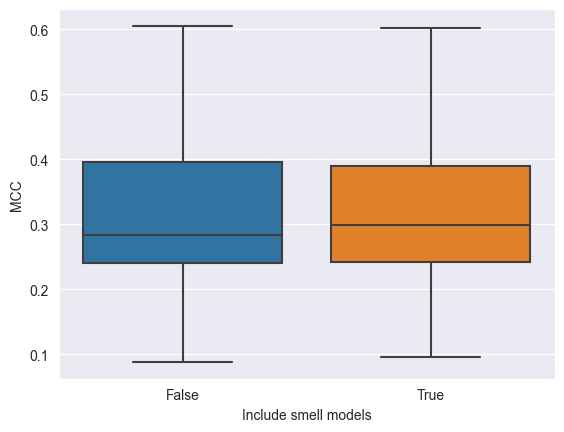

In [29]:
import seaborn as sns

smellchart_data = results.filter(["real_mcc", "smell_models"])
smellchart_data["MCC"] = smellchart_data["real_mcc"]
smellchart_data["Include smell models"] = smellchart_data["smell_models"]

smells_mcc = sns.boxplot(
    smellchart_data, y="MCC", x="Include smell models"
)

smells_mcc.get_figure().savefig("projects_mcc_smells.png")
smells_mcc


<AxesSubplot: xlabel='Include smell models', ylabel='Precision'>

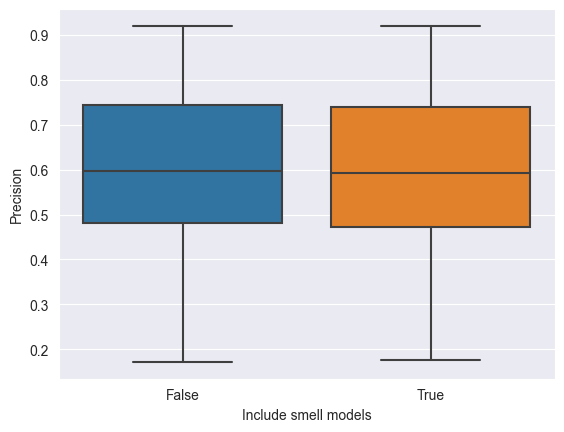

In [30]:
prec_smellchart_data = results.filter(["real_precision", "smell_models"])
prec_smellchart_data["Precision"] = prec_smellchart_data["real_precision"]
prec_smellchart_data["Include smell models"] = prec_smellchart_data["smell_models"]

smells_precision = sns.boxplot(
    prec_smellchart_data, y="Precision", x="Include smell models"
)

smells_precision.get_figure().savefig("projects_precision_smells.png")
smells_precision


<AxesSubplot: xlabel='ML model', ylabel='MCC'>

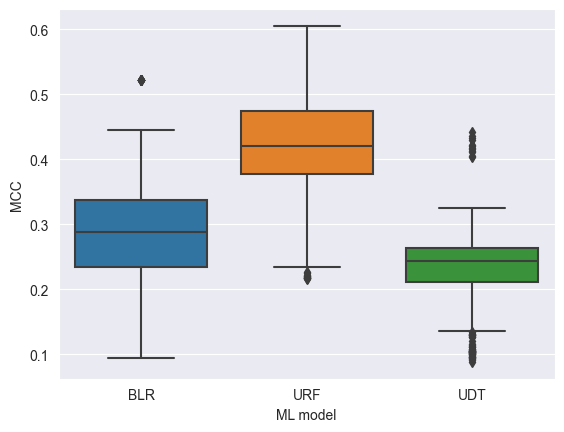

In [31]:
MODEL_NAME_MAPPING = {
    "basic-linear-ridge": "BLR",
    "unscaled-linear": "ULR",
    "basic-randomforest": "BRF",
    "unscaled-randomforest": "URF",
    "unscaled-decisiontree": "UDT",
    "basic-adaboost": "BAB",
    "basic-gradientboost": "BGB"
}


modeltype_data = results.loc[results.smell_models == False].filter(["real_mcc", "model_type"])
modeltype_data["MCC"] = modeltype_data["real_mcc"]
modeltype_data["ML model"] = modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

models_mcc = sns.boxplot(
    modeltype_data, y="MCC", x="ML model"
)

models_mcc.get_figure().savefig("projects_mcc_models.png")
models_mcc


<AxesSubplot: xlabel='ML model', ylabel='Precision'>

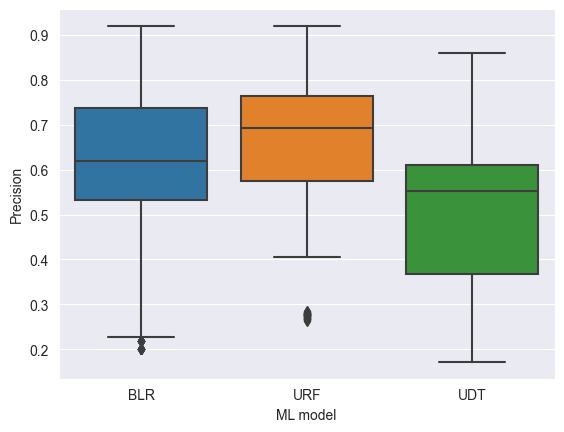

In [32]:
prec_modeltype_data = results.loc[results.smell_models == False].filter(["real_precision", "model_type"])
prec_modeltype_data["Precision"] = prec_modeltype_data["real_precision"]
prec_modeltype_data["ML model"] = prec_modeltype_data["model_type"].map(MODEL_NAME_MAPPING)

models_precision = sns.boxplot(
    prec_modeltype_data, y="Precision", x="ML model"
)

models_precision.get_figure().savefig("projects_precision_models.png")
models_precision


<AxesSubplot: xlabel='Metric set', ylabel='MCC'>

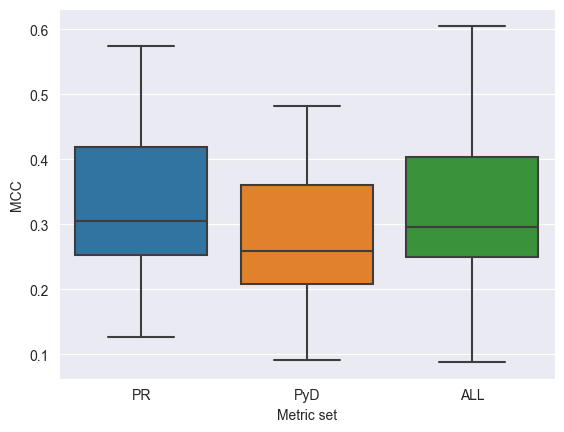

In [33]:
METRIC_SET_MAPPING = {
    "none": "NONE",
    "all-non-null-numeric": "ALL",
    "pydriller": "PyD",
    "product": "PD",
    "process": "PR",
    "javametrics-numeric": "JM",
    "javametrics2": "JM2",
    "javametrics2-process": "JM2R",
    "javametrics2-product": "JM2D",
    "pmd": "PMD"
}


metrictype_data = results.loc[results.smell_models == False].filter(["real_mcc", "metric_set"])
metrictype_data["Metric set"] = metrictype_data["metric_set"].map(METRIC_SET_MAPPING)

metrics_mcc = sns.boxplot(
    metrictype_data, y="real_mcc", x="Metric set"
)

metrics_mcc.set(xlabel = "Metric set", ylabel = "MCC")

metrics_mcc.get_figure().savefig("projects_mcc_metrics.png")
metrics_mcc

<AxesSubplot: xlabel='Project', ylabel='MCC'>

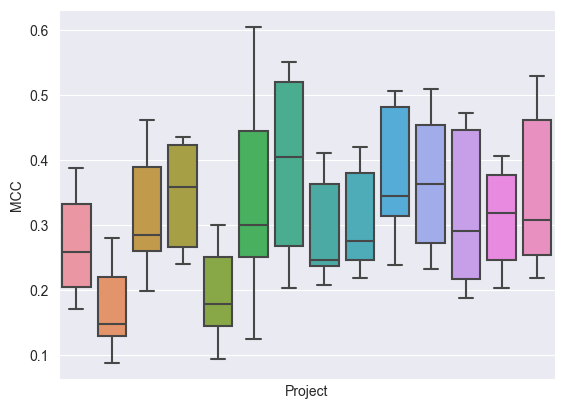

In [34]:
mcc_project_data = results.loc[results.smell_models == False].filter(["real_mcc", "PROJECT"])
mcc_project_data["MCC"] = mcc_project_data["real_mcc"]
mcc_project_data["Project"] = mcc_project_data["PROJECT"]

models_mcc = sns.boxplot(
    mcc_project_data, y="MCC", x="Project"
)
models_mcc.set(xticks=[])

models_mcc.get_figure().savefig("projects_mcc_project.png")
models_mcc


<AxesSubplot: xlabel='Project', ylabel='Precision'>

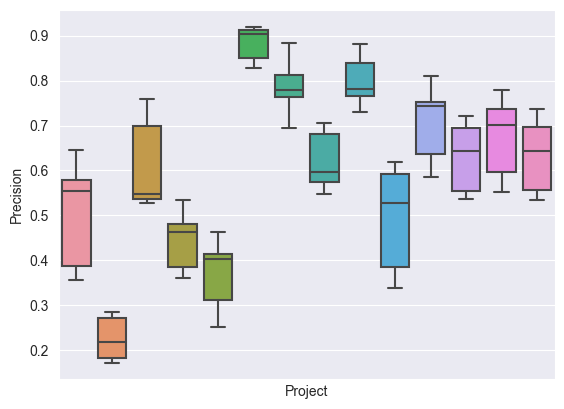

In [35]:
prec_project_data = results.loc[results.smell_models == False].filter(["real_precision", "PROJECT"])
prec_project_data["Precision"] = prec_project_data["real_precision"]
prec_project_data["Project"] = prec_project_data["PROJECT"]

models_precision = sns.boxplot(
    prec_project_data, y="Precision", x="Project"
)

models_precision.set(xticks=[])

models_precision.get_figure().savefig("projects_precision_project.png")
models_precision


<AxesSubplot: xlabel='Metric set', ylabel='Precision'>

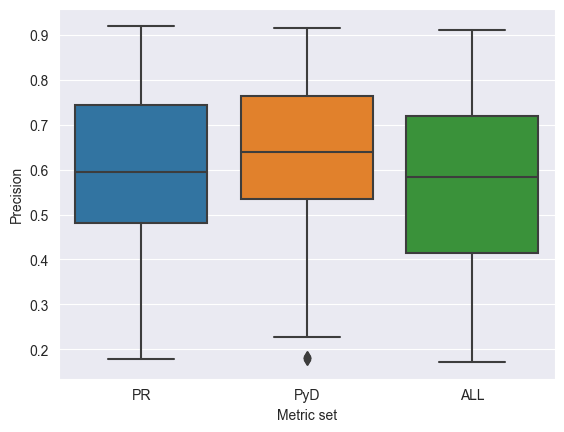

In [36]:
metrictype_data = results.loc[results.smell_models == False].filter(["real_precision", "metric_set"])
metrictype_data["Metric set"] = metrictype_data["metric_set"].map(METRIC_SET_MAPPING)

metrics_precision = sns.boxplot(
    metrictype_data, y="real_precision", x="Metric set"
)

metrics_precision.set(xlabel="Metric set", ylabel="Precision")

metrics_precision.get_figure().savefig("projects_precision_metrics.png")
metrics_precision

In [37]:
final_series.groupby("Project").describe()

MCC (smells)                                          \
                                                                        
                        count      mean       std       min       25%   
Project                                                                 
activemq                  9.0  0.278600  0.078749  0.163115  0.202987   
camel                     9.0  0.171731  0.066581  0.100250  0.123780   
cassandra                 9.0  0.325775  0.085435  0.227214  0.268524   
flink                     9.0  0.343800  0.073585  0.246613  0.269402   
groovy                    9.0  0.197364  0.061809  0.113215  0.158988   
hadoop-hdfs               9.0  0.357974  0.142914  0.218370  0.262941   
hadoop-mapreduce          9.0  0.366207  0.108453  0.223916  0.276166   
hbase                     9.0  0.302622  0.066970  0.229013  0.253037   
hive                      9.0  0.316119  0.072676  0.235939  0.242820   
ignite                    9.0  0.373967  0.098138  0.239140  0.286278   
kafka                     9.0  0.376154  0.098072  0.253046  0.262798   
spark                     9.0  0.323579  0.105423  0.198998  0.229753   
zeppelin                  9.0  0.326193  0.071477  0.219544  0.242507   
zookeeper                 9.0  0.361909  0.114955  0.216363  0.258864   

                                               MCC (no smells)            ...  \
                                                                          ...   
                       50%       75%       max           count      mean  ...   
Project                                                                   ...   
activemq          0.299561  0.342067  0.375397             9.0  0.268124  ...   
camel             0.153425  0.224678  0.274298             9.0  0.171604  ...   
cassandra         0.307674  0.396422  0.454359             9.0  0.317546  ...   
flink             0.355894  0.418084  0.430830             9.0  0.345067  ...   
groovy            0.171754  0.252399  0.281721             9.0  0.189680  ...   
hadoop-hdfs       0.293996  0.428231  0.593378             9.0  0.353772  ...   
hadoop-mapreduce  0.363610  0.405920  0.542279             9.0  0.381775  ...   
hbase             0.279036  0.371114  0.400814             9.0  0.287866  ...   
hive              0.305873  0.389159  0.418859             9.0  0.306066  ...   
ignite            0.367503  0.482757  0.496950             9.0  0.378081  ...   
kafka             0.389429  0.458495  0.497081             9.0  0.365915  ...   
spark             0.305336  0.441586  0.460033             9.0  0.319794  ...   
zeppelin          0.357603  0.388393  0.394275             9.0  0.309545  ...   
zookeeper         0.374187  0.452986  0.509616             9.0  0.352097  ...   

                 Precision (smells)           Precision (no smells)            \
                                                                                
                                75%       max                 count      mean   
Project                                                                         
activemq                   0.574943  0.614667                   9.0  0.511595   
camel                      0.268686  0.278919                   9.0  0.223340   
cassandra                  0.698431  0.733301                   9.0  0.601730   
flink                      0.476480  0.508732                   9.0  0.445283   
groovy                     0.415791  0.446625                   9.0  0.363216   
hadoop-hdfs                0.907560  0.916747                   9.0  0.881830   
hadoop-mapreduce           0.775720  0.802674                   9.0  0.790860   
hbase                      0.672914  0.681343                   9.0  0.624587   
hive                       0.832933  0.848698                   9.0  0.799938   
ignite                     0.536076  0.589910                   9.0  0.483153   
kafka                      0.744571  0.753323                   9.0  0.709210   
spark                      0

In [38]:
from effect_size_analysis.cliff_delta import cliff_delta


def calculate_cliff_deltas(all_results, column):
    descriptors = all_results[column].unique()
    cds = {}
    descriptors_1 = []
    descriptors_2 = []
    cd_mcc = []
    cd_mcc_min = []
    cd_mcc_max = []
    cd_prec = []
    cd_prec_min = []
    cd_prec_max = []

    descriptors_count = len(descriptors)
    for i in range(descriptors_count):
        item_1 = results[results[column] == descriptors[i]]
        for j in range(i + 1, descriptors_count):
            item_2 = results[results[column] == descriptors[j]]
            descriptors_1.append(descriptors[i])
            descriptors_2.append(descriptors[j])
            cd_mcc_curr = cliff_delta(item_1["real_mcc"], item_2["real_mcc"], alpha=0.05, accurate_ci=True)
            cd_mcc.append(cd_mcc_curr[0])
            cd_mcc_min.append(cd_mcc_curr[1][0])
            cd_mcc_max.append(cd_mcc_curr[1][1])
            cd_prec_curr = cliff_delta(item_1["real_precision"], item_2["real_precision"], alpha=0.05, accurate_ci=True)
            cd_prec.append(cd_prec_curr[0])
            cd_prec_min.append(cd_prec_curr[1][0])
            cd_prec_max.append(cd_prec_curr[1][1])
    return pd.DataFrame(
        {"descriptor_1": descriptors_1, "descriptor_2": descriptors_2, "CD MCC min": cd_mcc_min, "CD MCC": cd_mcc,
         "CD MCC max": cd_mcc_max, "CD precision min": cd_prec_min, "CD precision": cd_prec,
         "CD precision max": cd_prec_max})


In [39]:

calculate_cliff_deltas(results, "model_type")

,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,basic-linear-ridge,unscaled-randomforest,-0.749017,-0.716553,-0.680657,-0.248415,-0.199464,-0.149496
1,basic-linear-ridge,unscaled-decisiontree,0.462190,0.508645,0.552316,0.190118,0.239843,0.288341
2,unscaled-randomforest,unscaled-decisiontree,0.886257,0.905628,0.921837,0.352210,0.399765,0.445261


In [40]:

calculate_cliff_deltas(results, "metric_set")

,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,process,pydriller,0.163877,0.213337,0.261727,-0.121528,-0.071471,-0.021051
1,process,all-non-null-numeric,-0.011958,0.038582,0.088925,0.001514,0.051943,0.102108
2,pydriller,all-non-null-numeric,-0.229508,-0.180496,-0.130570,0.070378,0.120625,0.170262


In [41]:

calculate_cliff_deltas(results, "smell_models")

,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,False,True,-0.074519,-0.033425,0.007783,-0.006487,0.034678,0.075726


In [42]:

calculate_cliff_deltas(results, "PROJECT")

L:\PhD\defect-prediction\runners\init\lib\site-packages\effect_size_analysis\cliff_delta.py:94: RuntimeWarning: invalid value encountered in double_scalars
  (delta_val - delta_val ** 3 - ci_size) / denom_corretion,
L:\PhD\defect-prediction\runners\init\lib\site-packages\effect_size_analysis\cliff_delta.py:95: RuntimeWarning: invalid value encountered in double_scalars
  (delta_val - delta_val ** 3 + ci_size) / denom_corretion,


,descriptor_1,descriptor_2,CD MCC min,CD MCC,CD MCC max,CD precision min,CD precision,CD precision max
0,activemq,camel,0.599828,0.678884,0.744813,NaN,1.000000,NaN
1,activemq,cassandra,-0.414499,-0.315458,-0.209031,-0.293679,-0.184799,-0.071186
2,activemq,flink,-0.548033,-0.460391,-0.362749,0.270949,0.393347,0.503228
3,activemq,groovy,0.492379,0.581019,0.657730,0.549926,0.637860,0.711808
4,activemq,hadoop-hdfs,-0.427411,-0.328361,-0.221521,NaN,-1.000000,NaN
...,...,...,...,...,...,...,...,...
86,kafka,zeppelin,0.280168,0.384516,0.479884,0.142249,0.250664,0.353137
87,kafka,zookeeper,-0.028923,0.081962,0.190854,0.556551,0.641975,0.713967
88,spark,zeppelin,-0.159454,-0.044153,0.072337,-0.509467,-0.416024,-0.312883
89,spark,zookeeper,-0.334563,-0.232082,-0.124175,-0.001422,0.108389,0.215618
